<div style="dispaly:flex"><h1>Car-centric Planning and Obesity in the U.S.</h1></div>

In [27]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt 
import us_state_abbrev
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Walkability from walkscore.com

<img src="table.png" alt="table"/>

## Web Scrapping

In [3]:
walk_score_url='https://www.walkscore.com/cities-and-neighborhoods/'
r=requests.get(walk_score_url)
source=r.text
soup = BeautifulSoup(source, 'html5lib')
body = soup.find(id="citysort")

In [4]:
cities=body.select("tbody")
cities

[<tbody> <tr id="city_2654"> <td class="city"><a href="/CA-QC/Gatineau">Gatineau</a></td> <td class="state">CA-QC</td> <td class="score">37.4</td> <td class="tsc">40.8</td> <td class="bsc">57.6</td> <td class="pop">265,349</td> </tr> <tr id="city_2683"> <td class="city"><a href="/CA-QC/Longueuil">Longueuil</a></td> <td class="state">CA-QC</td> <td class="score">54.4</td> <td class="tsc">52.5</td> <td class="bsc">69.6</td> <td class="pop">231,409</td> </tr> <tr id="city_2714"> <td class="city"><a href="/CA-QC/Qu%C3%A9bec">QuÃ©bec</a></td> <td class="state">CA-QC</td> <td class="score">44.6</td> <td class="tsc">46.9</td> <td class="bsc">59.3</td> <td class="pop">516,622</td> </tr> <tr id="city_2752"> <td class="city"><a href="/CA-QC/Montr%C3%A9al">MontrÃ©al</a></td> <td class="state">CA-QC</td> <td class="score">65.4</td> <td class="tsc">67.0</td> <td class="bsc">72.6</td> <td class="pop">1,649,519</td> </tr> <tr id="city_2753"> <td class="city"><a href="/CA-QC/Laval">Laval</a></td> <td 

In [5]:
state_list=[]

for city in cities:
    for i in range(130):
        tr_element=city("tr")[i]
        td_element=tr_element("td")[1].string
        state_list.append(td_element)
        
state_list=state_list[22:]

In [6]:
city_list=[]

for city in cities:
    for i in range(130):
        tr_element=city("tr")[i]
        td_element=tr_element("td")[0].string
        city_list.append(td_element)
        
city_list=city_list[22:]

In [7]:
walk_list=[]

for city in cities:
    for i in range(130):
        tr_element=city("tr")[i]
        td_element=tr_element("td")[2].string
        walk_list.append(td_element)
        
walk_list=walk_list[22:]

## Pandas Dataframe

In [36]:
walk_scores=pd.DataFrame(
    {'City': city_list,
     'State': state_list,
     'Walk Score': walk_list
    })
walk_scores['Walk Score']=walk_scores['Walk Score'].astype(float)
walk_scores.sort_values(by=['Walk Score'], ascending=False)

,City,State,Walk Score
3,San Francisco,CA,88.7
22,New York,NY,88.0
85,Jersey City,NJ,86.6
49,Boston,MA,82.8
18,Chicago,IL,77.2
...,...,...,...
70,Montgomery,AL,25.8
34,Jacksonville,FL,25.6
79,Winston-Salem,NC,22.5
81,Fayetteville,NC,21.4


## By State

In [10]:
by_state=Counter(walk_scores['State']).most_common()
by_state

[('CA', 17),
 ('TX', 13),
 ('AZ', 7),
 ('FL', 6),
 ('NC', 6),
 ('VA', 5),
 ('NV', 5),
 ('OH', 4),
 ('NY', 3),
 ('CO', 3),
 ('WA', 2),
 ('LA', 2),
 ('MO', 2),
 ('OK', 2),
 ('AL', 2),
 ('IN', 2),
 ('WI', 2),
 ('NJ', 2),
 ('MN', 2),
 ('TN', 2),
 ('KY', 2),
 ('PA', 2),
 ('NE', 2),
 ('MI', 1),
 ('IL', 1),
 ('OR', 1),
 ('GA', 1),
 ('MD', 1),
 ('MA', 1),
 ('IA', 1),
 ('HI', 1),
 ('KS', 1),
 ('AK', 1),
 ('ID', 1),
 ('NM', 1),
 ('DC', 1)]

In [11]:
avg_score=[]
avg_state_list=[]
for i in range(len(by_state)):
    state=by_state[i][0]
    state_mean=np.mean(list(walk_scores[walk_scores['State']==state]['Walk Score']))
    avg_score.append(state_mean)
    avg_state_list.append(state)


In [37]:
walk_scores=pd.DataFrame(
    {
     'State': avg_state_list,
     'Walk Score': avg_score
    })
walk_scores.sort_values(by=['Walk Score'], ascending=False)

,State,Walk Score
28,MA,82.800000
17,NJ,81.250000
24,IL,77.200000
35,DC,76.700000
8,NY,71.766667
21,PA,68.600000
25,OR,67.300000
18,MN,65.900000
30,HI,65.700000
27,MD,64.300000


## Walk Score GeoMap 

<img src="Walk_Score.png" alt="source" style="width: 800px;"/>


## Obesity from 2020 CDC Study

In [13]:
obesity=pd.read_csv('2020-overall.csv') 
obesity=obesity.drop('95% CI',axis=1)
not_rep=['Montana','Utah',
         'West Virginia','Wyoming','North Dakota',
         'South Dakota', 'Arkansas', 'South Carolina',
         'West Virgina', 'Delaware', 'Connecticut', 'Rhode Island',
         'Vermont', 'Mississippi','New Hampshire', 'Maine', 'Guam','Puerto Rico']

In [14]:
obesity = obesity[~obesity.State.isin(not_rep)]


In [38]:
obesity.sort_values(by=['Prevalence'], ascending=False)

,State,Prevalence
0,Alabama,39.0
19,Louisiana,38.1
15,Indiana,36.8
18,Kentucky,36.6
16,Iowa,36.5
37,Oklahoma,36.4
45,Texas,35.8
44,Tennessee,35.6
36,Ohio,35.5
17,Kansas,35.3


<img src="obesity.png" alt="source" style="width: 800px;"/>


## Comparative GeoMaps

<div style="display:flex">
    <div style="float:left"><img src="obesity.png" height="400" width="auto"/></div>
    <div style="float:left"><img src="Walk_Score.png" height="400" width="auto"/></div>
</div>



## Machine Learning Techniques

In [17]:
walk_scores=walk_scores.sort_values(by=['State'], ascending=True)

In [18]:
# for i in range(len(walk_scores.State)):
#     list1=walk_scores["State"].tolist()
#     list2=obesity["State"].tolist()
#     print(list1[i], list2[i])

In [19]:
sorted_state_walk=walk_scores["Walk Score"].tolist()
sorted_state_obesity=obesity["Prevalence"].tolist()
y=np.array(sorted_state_obesity).reshape(-1, 1)
X=np.array(sorted_state_walk).reshape(-1, 1)

In [20]:
cluster=[]
for i in range(len(sorted_state_walk)):
    cluster.append([sorted_state_walk[i], sorted_state_obesity[i]])
cluster=np.array(cluster)

Text(0.5, 1.0, 'State Walk Score v.s. Obesity Prevelance')

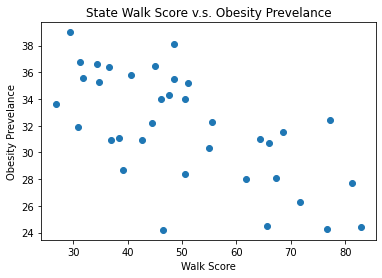

In [28]:
plt.scatter(X,y)
plt.ylabel('Obesity Prevelance')
plt.xlabel("Walk Score")
plt.title("State Walk Score v.s. Obesity Prevelance")

## Linear Regression

In [22]:
reg = LinearRegression().fit(X,y)

Text(0.5, 1.0, 'State Walk Score v.s. Obesity Prevelance')

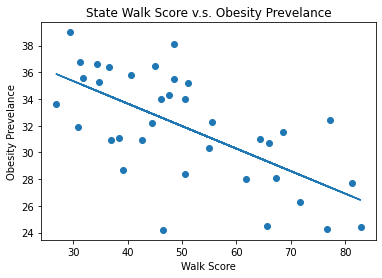

In [29]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X))
plt.ylabel('Obesity Prevelance')
plt.xlabel("Walk Score")
plt.title("State Walk Score v.s. Obesity Prevelance")

In [24]:
reg.score(X,y)

0.42100924582279164

## Classification - KMeans

Text(0.5, 1.0, 'State Walk Score v.s. Obesity Prevelance')

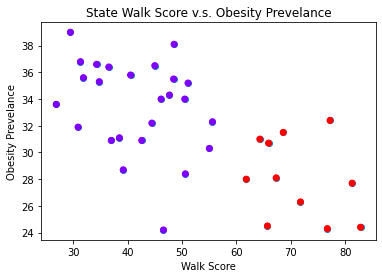

In [30]:
plt.scatter(cluster[:,0],cluster[:,1], label='True Position')
kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster)
plt.scatter(cluster[:,0],cluster[:,1], c=kmeans.labels_, cmap='rainbow')
plt.ylabel('Obesity Prevelance')
plt.xlabel("Walk Score")
plt.title("State Walk Score v.s. Obesity Prevelance")

## Classification - DBScan

Text(0.5, 1.0, 'State Walk Score v.s. Obesity Prevelance')

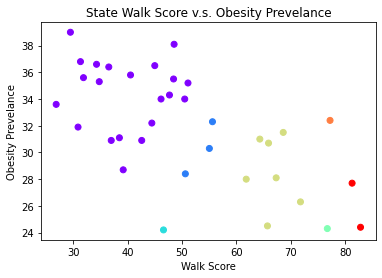

In [31]:
db = DBSCAN(eps=5, min_samples=1)
db.fit(cluster)
plt.scatter(cluster[:,0],cluster[:,1], c=db.labels_, cmap='rainbow')
plt.ylabel('Obesity Prevelance')
plt.xlabel("Walk Score")
plt.title("State Walk Score v.s. Obesity Prevelance")

## Work Cited
1. “Walk Score Methodology.” Walk Score, https://www.walkscore.com/methodology.shtml. 

2. “Adult Obesity Prevalence Maps.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 16 May 2022, https://www.cdc.gov/obesity/data/prevalence-maps.html. 
3. “Learn.” Scikit, https://scikit-learn.org/stable/. 